<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Iris.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Guided ML With The Iris Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Multiclass classification | Identify a flower's class |

Contents:
1. Loading the data
2. Setting up supervised learning problem (selecting features)
3. Creating a first model
    - Creating train and test datasets
    - Normalizing train and test
    - Fitting and predicting
4. Evaluate the frist model predictions
5. Crossvalidation of the model
6. Creating an end to end ML pipeline
    - Train/Test Split
    - Normalize
    - Crossvalidations
    - Model
    - fitting and predicting

## Instructions with NBGrader removed

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## About the dataset

[Iris](https://archive.ics.uci.edu/ml/datasets/iris) is a well-known multiclass dataset. It contains 3 classes of flowers with 50 examples each. There are a total of 4 features for each flower.

![](./classic-datasets/images/Iris-versicolor-21_1.jpg)

## Package setups

1. Run the following two cells to initalize the required libraries. 

In [1]:
#to debug package errors
import sys
sys.path
sys.executable

'C:\\Users\\Saurabh\\anaconda3\\envs\\test\\python.exe'

In [2]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data

1. Load the iris dataset using ```datasets.load_iris()```
2. Investigate the data structure with ```.keys()```
3. Construct a dataframe from the dataset
4. Create a 'target' and a 'class' column that contains the target names and values
5. Display a random sample of the dataframe 

In [4]:
#Your code here.
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = data.target
df['class'] = df['target'].apply(lambda x: data['target_names'][x])

In [20]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'class'],
      dtype='object')

In [22]:
df['class'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: class, dtype: int64

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
#your code here


,sepal length,sepal width,petal length,petal width,target,class
85,6.0,3.4,4.5,1.6,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica
77,6.7,3.0,5.0,1.7,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
121,5.6,2.8,4.9,2.0,2,virginica
12,4.8,3.0,1.4,0.1,0,setosa
31,5.4,3.4,1.5,0.4,0,setosa
96,5.7,2.9,4.2,1.3,1,versicolor


### Question
Find the X and y values we're looking for. Notice that y is categorical and thus, we could **one-hot encode it** if we are looking at **class** or we can just pick **target**. In order to one hot encode we have  to re-shape `y` it using the **.get_dummies** function. 

#### For the purpose of this exercise, do not use hot encoding, go only for target but think about if you have to drop it somewhere or not...

In [35]:
# YOUR CODE HERE
predictors = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
X = df[predictors]
y = df.target

In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## Step 2: Setting up supervised learning problem (selecting features)

Feature selection is an essential step in improving a model's perfromance. In the first version of the model we will use the 'sepal length' and 'sepal width' as predicting features. Later we will see the effect of adding additional features.

1. Assign the values of the 'target' to Y as a numpy array
2. Assign the remaining feature values to X as a numpy array
3. Check the shape of X and Y. Check the first few values.
    - Can we confirm our X and Y are created correctly?

In [61]:
X = df[['sepal length (cm)','sepal width (cm)']].values  # .reshape(-1,2)
Y = df['target'].values
print(Y.shape)
print(Y[0:5])
print(X.shape)
print(X[0:5])

(150,)
[0 0 0 0 0]
(150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


## Step 3: Creating the first model

In lecture we learned about creating a train and test datasets, normalizing, and fitting a model. In this step we will see how to build a simple version of this.

We have to be careful when constructing our train and test datasets. First, when we create train and test datasets we have to be careful that we always have the same datapoints in each set. Otherwise our results won't be reproduceable or we might introduce a bias into our model.

We also need to be attentive to when we normalize the data. What would be the effect of normalizing the data (i.e. with StandardScaler to a range between 0 - 1) before we create our train and test sets? Effectively we would use information in the test set to structure the values in the training set and vice versa. Therefore normalizing train and test independently is the preferred method.

1. Create X_train, X_test, Y_train, Y_test using ```train_test_split()``` with an 80/20 train/test split. Look in the SKLearn documentation to understand how the function works.
    - Inspect the first few rows of X_train.
    - Run the cell a few times. Do the first few rows change?
    - What option can we use in ```train_test_split()``` to stop this from happening?
2. Normalize the train and test datasets with ```StandardScaler```
    - We can fit the transform with ```.fit()``` and ```.transform()``` to apply it. Look in the documentation for an esample of how to do this.
    - Does it make sense to normalize Y_train and Y_test?
3. Initalize a ```LogisticRegression()``` model and use the ```.fit()``` method to initalize the first model.
    - We will pass the X_train and Y_train variables to the ```.fit()``` method.
    - Once the model is fit, use the ```.predict()``` with the X_test and save the output as predictions.

In [62]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [63]:
#split train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size=0.20, random_state=1)
X_train[0:5]

array([[ 0.31099753, -0.13197948],
       [ 2.24968346, -0.13197948],
       [-0.29484182, -1.28296331],
       [ 0.67450115, -0.59237301],
       [-0.05250608, -0.59237301]])

In [65]:
# Train and Predict using linear regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model = log_reg.fit(X_train,y_train)
y_prediction = model.predict(X_test)

In [66]:
y_prediction

array([0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 1])

## Step 4: Evaluate the frist model's predictions

We will learn more about how to evaluate the performance of a classifier in later lessons. For now we will use % accuracy as our metric. It is important to know that this metric only helps us understand the specific performance of our model and not, for example, where we can improve it, or where it already perfoms well.

1. Use ```.score()``` to evaluate the performance of our first model.

In [67]:
model.score(X_test,y_test)

0.8333333333333334

In [38]:
#evaluating the performace of our first model
#your code here



0.9

## Step 5: Question your results. 
What accuracy did you achieve? Is it 70, 90%? Anything above 70% is a good fit for our first result. How do we know it is reproducible? **If we run the model again and our performance is 85%, which one is correct**? And what about improving our model? 

## However ...
There is one crucial mistake that has been made in the exercise above -even if we achieved great results-. Can you spot it? You can go back to the lecture slides for inspiration. 

*Type your answer here...*

## Optional:
Repeat the cells you need to change in the exercise and run the classifier again. What is the new accuracy and why is this better?

In [1]:
#your code here

# Considering all the features/columns

In [78]:
predictors = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
X = df[predictors].values
y = df['target'].values
print(y.shape)
print(y[0:5])

print(X.shape)
print(X[0:5])


(150,)
[0 0 0 0 0]
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [79]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

#split train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.20, random_state=1)
X_train[0:5]

array([[ 0.31099753, -0.13197948,  0.47857113,  0.26414192],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [-0.29484182, -1.28296331,  0.08070915, -0.13075464],
       [ 0.67450115, -0.59237301,  1.0469454 ,  1.18556721],
       [-0.05250608, -0.59237301,  0.76275827,  1.58046376]])

In [80]:
# Train and Predict using linear regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model = log_reg.fit(X_train,y_train)
y_prediction = model.predict(X_test)

In [81]:
model.score(X_test,y_test)

0.9666666666666667

In [82]:
from sklearn import metrics

print('The accuracy of the Logistic Regression is, {:.3f}'.format(metrics.accuracy_score(y_prediction,y_test)))

The accuracy of the Logistic Regression is, 0.967


Text(0.5, 1.0, 'Logistic Regression Confusion matrix, without normalization')

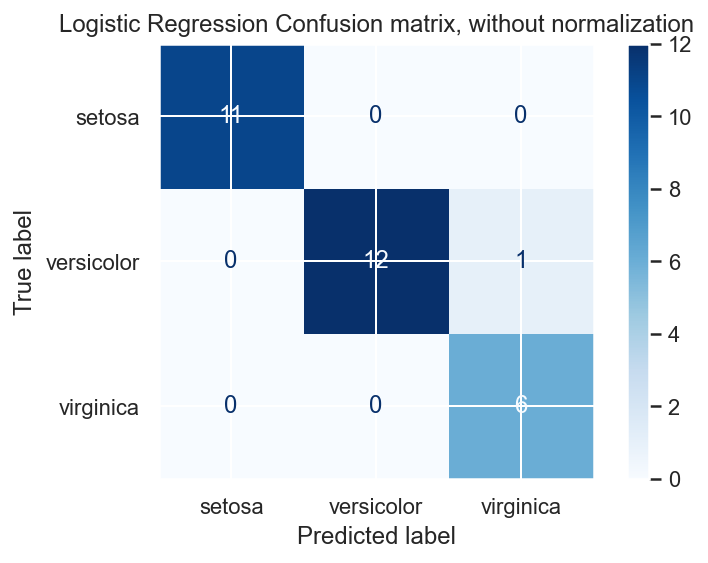

In [84]:
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Logistic Regression Confusion matrix, without normalization')